In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('creditcard_train.csv')

In [4]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,76460.0,1.111098,0.179648,0.531749,1.482757,-0.310199,-0.364751,0.109840,-0.052502,0.238723,...,-0.068487,0.011689,-0.038433,0.414174,0.619740,-0.334748,0.038619,0.022382,24.24,0
1,141401.0,2.134944,0.154700,-2.054125,0.068207,0.430856,-1.839736,0.825559,-0.631772,0.183558,...,0.149252,0.591899,-0.040887,0.109212,0.442464,0.237539,-0.084814,-0.078692,2.07,0
2,74888.0,1.219661,1.121000,-2.157328,1.545964,1.751149,0.332003,0.182626,0.222810,-0.020855,...,-0.440100,-1.003212,-0.357910,-2.117555,0.863884,-0.219413,0.093550,0.095178,1.00,0
3,13642.0,1.220170,-0.036126,0.762629,0.121446,-0.600395,-0.365912,-0.490836,-0.019100,1.480623,...,-0.310389,-0.739730,0.106822,-0.021256,-0.015298,0.752247,-0.097937,-0.003457,18.11,0
4,31410.0,1.192668,0.388493,0.435644,0.709839,-0.255402,-0.766393,0.081094,-0.141418,-0.141551,...,-0.227874,-0.574991,0.188157,0.386786,0.133256,0.100744,0.000401,0.032658,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,137196.0,-2.776509,-2.872034,0.601161,-2.303745,0.598829,-0.266395,-0.880467,0.337638,-1.699337,...,-0.554739,-1.233185,-0.996793,0.239593,0.567078,-0.350510,0.024945,-0.854590,140.09,0
199360,66070.0,-0.353643,0.783491,-0.031022,-1.213201,2.460076,3.365081,0.115234,0.937210,-0.521030,...,-0.282958,-0.903494,-0.061260,0.983508,-0.036452,0.086463,0.267998,0.114031,0.99,0
199361,151913.0,-0.024482,0.601015,-0.101442,-0.673937,0.278367,-0.709314,2.160349,-0.775577,-0.317002,...,-0.130162,-0.049071,0.068819,-0.039701,-0.285949,0.370466,-0.234527,-0.244742,170.88,0
199362,83248.0,-1.577217,1.269349,-0.685807,0.097089,0.660702,-0.945042,-0.103273,0.849309,-0.923695,...,0.023542,-0.185828,-0.365154,-0.584549,-0.222324,0.297363,0.067875,-0.066513,0.76,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199364 entries, 0 to 199363
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     19

In [6]:
train.isnull().sum().sum()

0

In [7]:
train.shape

(199364, 31)

<AxesSubplot:>

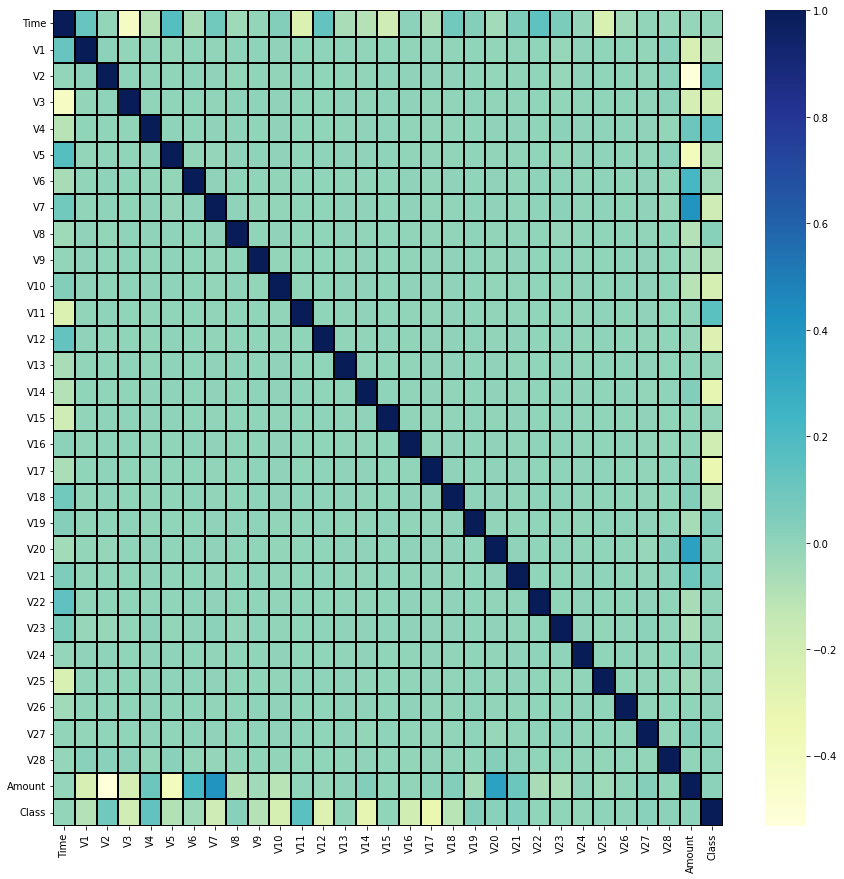

In [8]:
plt.figure(figsize=(15, 15))

sns.heatmap(train.corr(), linewidth=0.3, linecolor='black', cmap="YlGnBu")

<AxesSubplot:>

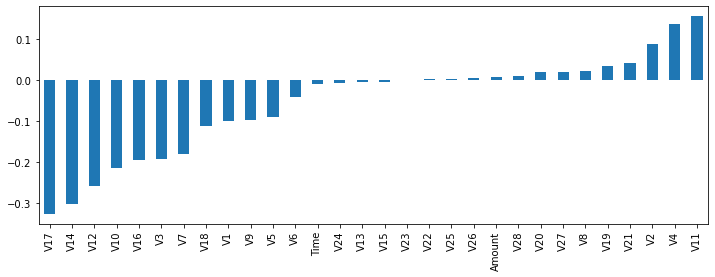

In [9]:
train.corr()['Class'].sort_values().drop('Class').plot(kind='bar',figsize=(12,4))

## Checking the class value counts

0    199021
1       343
Name: Class, dtype: int64


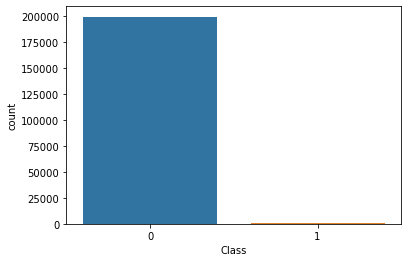

In [10]:
sns.countplot(x='Class',data=train,order = train['Class'].value_counts().index)
print(train['Class'].value_counts())

In [11]:
100*train['Class'].value_counts()/len(train)

0    99.827953
1     0.172047
Name: Class, dtype: float64

## Checking if there are categorical features

In [12]:
for i in train.columns:
    print('Number of unique values is  ',train[[i]].nunique())

Number of unique values is   Time    107202
dtype: int64
Number of unique values is   V1    194184
dtype: int64
Number of unique values is   V2    194184
dtype: int64
Number of unique values is   V3    194184
dtype: int64
Number of unique values is   V4    194184
dtype: int64
Number of unique values is   V5    194184
dtype: int64
Number of unique values is   V6    194184
dtype: int64
Number of unique values is   V7    194184
dtype: int64
Number of unique values is   V8    194184
dtype: int64
Number of unique values is   V9    194184
dtype: int64
Number of unique values is   V10    194184
dtype: int64
Number of unique values is   V11    194184
dtype: int64
Number of unique values is   V12    194184
dtype: int64
Number of unique values is   V13    194184
dtype: int64
Number of unique values is   V14    194184
dtype: int64
Number of unique values is   V15    194184
dtype: int64
Number of unique values is   V16    194184
dtype: int64
Number of unique values is   V17    194184
dtype: int64


<AxesSubplot:xlabel='Class', ylabel='Amount'>

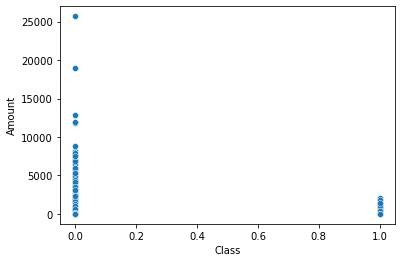

In [13]:
sns.scatterplot(x=train['Class'], y=train['Amount'])

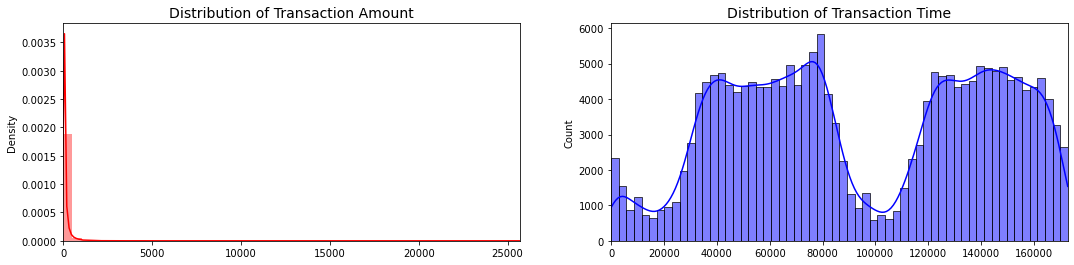

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = train['Amount'].values
time_val = train['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])



sns.histplot(time_val, ax=ax[1], color='b',kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## Time and amount are not scaled as the other features, we need to scale them.
we will use rubost scaler which is rubost to the outliers

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [16]:
Scaler = RobustScaler()

In [17]:
train['scaled_amount'] = Scaler.fit_transform(train['Amount'].values.reshape(-1,1))

In [18]:
train['scaled_time'] = Scaler.fit_transform(train['Time'].values.reshape(-1,1))

In [19]:
# we will drop time and amount

train.drop(['Time','Amount'], axis=1, inplace=True)

In [20]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.111098,0.179648,0.531749,1.482757,-0.310199,-0.364751,0.109840,-0.052502,0.238723,-0.137877,...,0.011689,-0.038433,0.414174,0.619740,-0.334748,0.038619,0.022382,0,0.031406,-0.099144
1,2.134944,0.154700,-2.054125,0.068207,0.430856,-1.839736,0.825559,-0.631772,0.183558,0.019075,...,0.591899,-0.040887,0.109212,0.442464,0.237539,-0.084814,-0.078692,0,-0.278047,0.663941
2,1.219661,1.121000,-2.157328,1.545964,1.751149,0.332003,0.182626,0.222810,-0.020855,-1.954201,...,-1.003212,-0.357910,-2.117555,0.863884,-0.219413,0.093550,0.095178,0,-0.292983,-0.117616
3,1.220170,-0.036126,0.762629,0.121446,-0.600395,-0.365912,-0.490836,-0.019100,1.480623,-0.364567,...,-0.739730,0.106822,-0.021256,-0.015298,0.752247,-0.097937,-0.003457,0,-0.054158,-0.837283
4,1.192668,0.388493,0.435644,0.709839,-0.255402,-0.766393,0.081094,-0.141418,-0.141551,-0.355581,...,-0.574991,0.188157,0.386786,0.133256,0.100744,0.000401,0.032658,0,-0.294518,-0.628501


# Undersampling technique

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
100*train['Class'].value_counts()/len(train)

0    99.827953
1     0.172047
Name: Class, dtype: float64

In [23]:
print('Not Fraud ', round(100*train['Class'].value_counts()[0]/len(train),2),'% of the dataset')
print('Fraud ', round(100*train['Class'].value_counts()[1]/len(train),2),'% of the dataset')

Not Fraud  99.83 % of the dataset
Fraud  0.17 % of the dataset


In [24]:
X = train.drop('Class', axis=1)
y = train['Class']

## 1- Random UnderSampling technique

#### Splitting the Data (Original DataFrame)
Before proceeding with the `Random UnderSampling technique` we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to `test our models on the original testing set` not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
# creating stratify sampling based on class
stratifyCV = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [27]:
for train_index, test_index in stratifyCV.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 39868  39869  39870 ... 199361 199362 199363] Test: [    0     1     2 ... 41310 42669 43022]
Train: [     0      1      2 ... 199361 199362 199363] Test: [39868 39869 39870 ... 84120 84182 84440]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 79738  79739  79740 ... 124868 125154 125222]
Train: [     0      1      2 ... 199361 199362 199363] Test: [119605 119606 119607 ... 159490 159491 159492]
Train: [     0      1      2 ... 159490 159491 159492] Test: [159047 159493 159494 ... 199361 199362 199363]


## Check the Distribution of the labels

In [28]:
# for the train dataset
100*original_ytrain.value_counts()/len(original_ytrain)

0    99.827578
1     0.172422
Name: Class, dtype: float64

In [29]:
# for the test dataset
100*original_ytest.value_counts()/len(original_ytest)

0    99.829454
1     0.170546
Name: Class, dtype: float64

### we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.


### Steps:
- The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label).

- Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and `343` cases of non-fraud transactions.

- After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.


__Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 343 non-fraud transaction from 199,021 non-fraud transaction)__

In [30]:
#foltering the fraud transaction
fraud=train.loc[train['Class']==1]

In [31]:
len(fraud)

343

In [32]:
#train.loc[train['Class']==0]

In [33]:
#selecting the first 343 rows as not fraud
not_fraud=train.loc[train['Class']==0][:343]

In [34]:
df_concat=pd.concat([fraud,not_fraud])

In [35]:
# Shuffle dataframe rows
df=df_concat.sample(frac=1)

In [36]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
47,-0.321084,0.836512,-0.742182,-0.701522,0.998196,-0.902667,0.639055,0.153341,-0.333154,-0.842458,...,1.278432,-0.090199,0.534110,-0.780533,-0.351613,0.146115,0.166626,0,-0.292983,0.525943
55,2.127554,-1.551985,-0.355897,-1.425165,-1.676873,-0.705231,-1.212498,-0.208941,-1.135844,1.449743,...,-0.607668,0.402901,-0.051864,-0.614145,-0.491166,0.035739,-0.021507,0,0.809715,0.593497
219,0.251492,0.939998,-0.623150,-0.362205,1.361844,-0.907140,1.143896,-0.444603,0.129260,-0.569688,...,0.962588,-0.321665,-0.825114,-0.243216,-0.119030,0.228596,-0.037284,0,-0.287678,0.587175
185323,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,-5.620232,-15.123752,...,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,1,0.327878,0.108615
76,1.375792,-0.414610,0.579765,-0.659644,-1.046697,-1.002681,-0.463264,-0.252209,-0.915278,0.569307,...,-0.324959,0.107835,0.394751,0.260781,-0.484899,0.014071,0.027633,0,0.042014,-0.491785


In [37]:
# now we have equal distribution of the class samples
print(df['Class'].value_counts()/len(df))

0    0.5
1    0.5
Name: Class, dtype: float64


## Correlation matrix
__The correlation matrix is the most important aspect of understanding a transaction's data. It determines if there are features that can influence a transaction's likelihood of being fraudulent. However, it's also important to use the correct dataframe (undersampled) in order to see which features have a positive or negative correlation.__

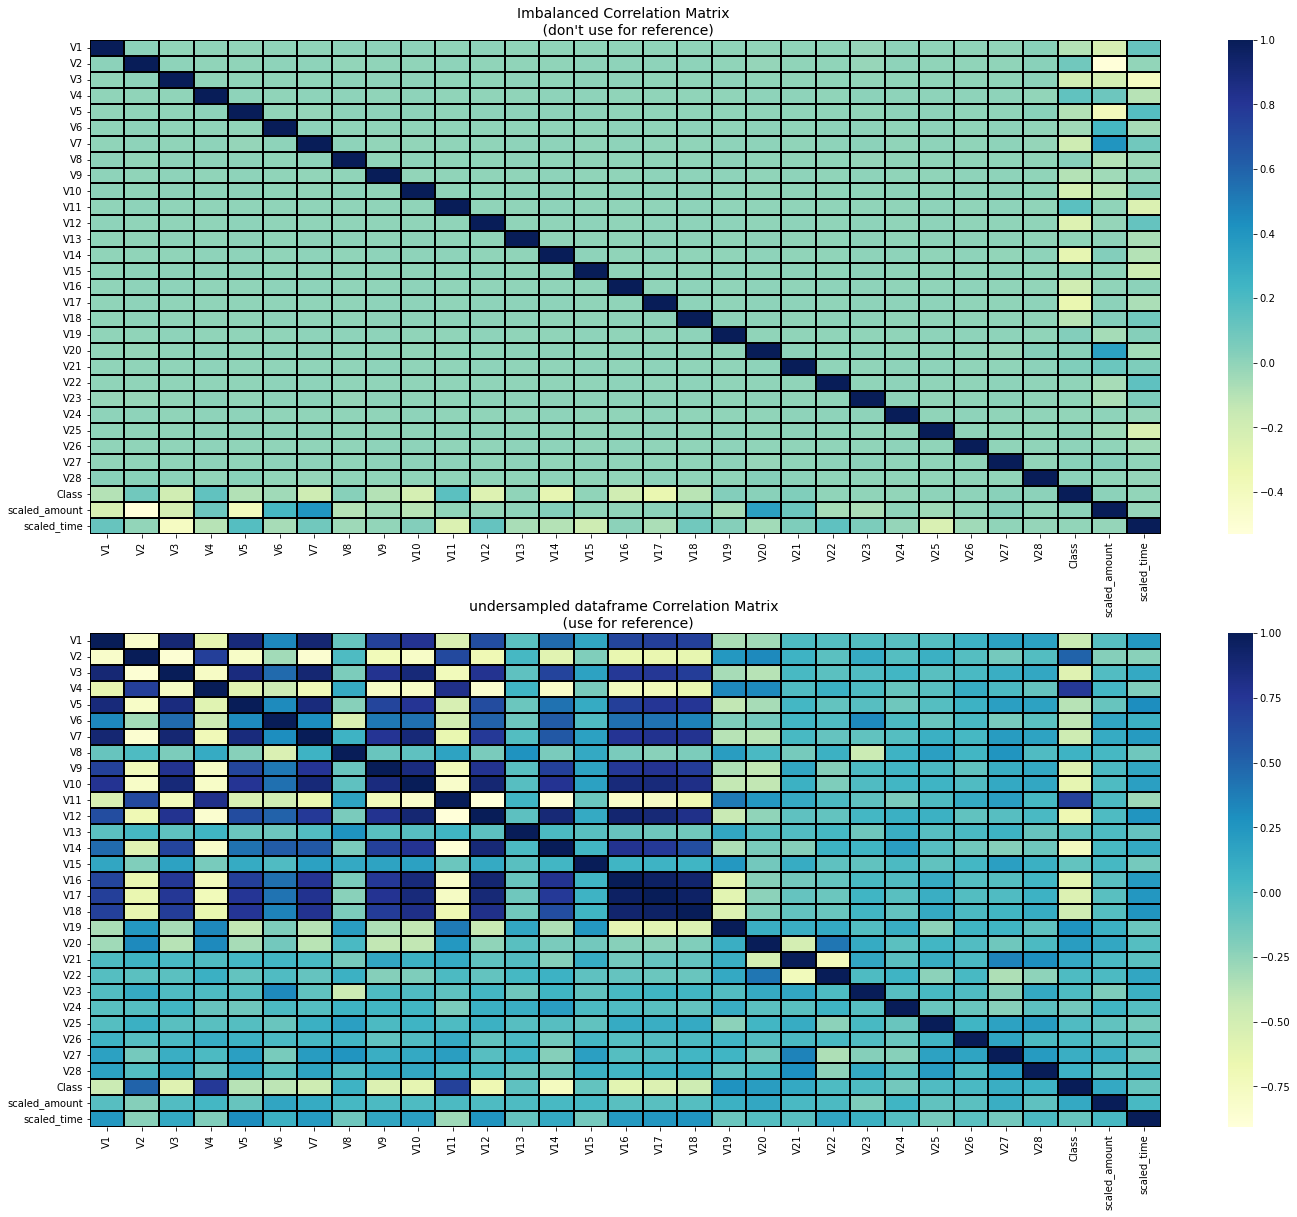

In [38]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = train.corr()
sns.heatmap(corr,linewidth=0.3,linecolor='black', cmap='YlGnBu', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


# the subsampled DataFrame
sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, linewidth=0.3,linecolor='black', cmap='YlGnBu', annot_kws={'size':20}, ax=ax2)
ax2.set_title('undersampled dataframe Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

- We can see that V18, V17, V16, V14, V12, V10, V9, V7, V6, V5, V3, V1 have negative correlation with the Class
- we can see also that V2, V4, V11 have Positive correlation with the Class

Text(0.5, 1.0, 'Undersampled dataframe Correlation Matrix \n (use for reference)')

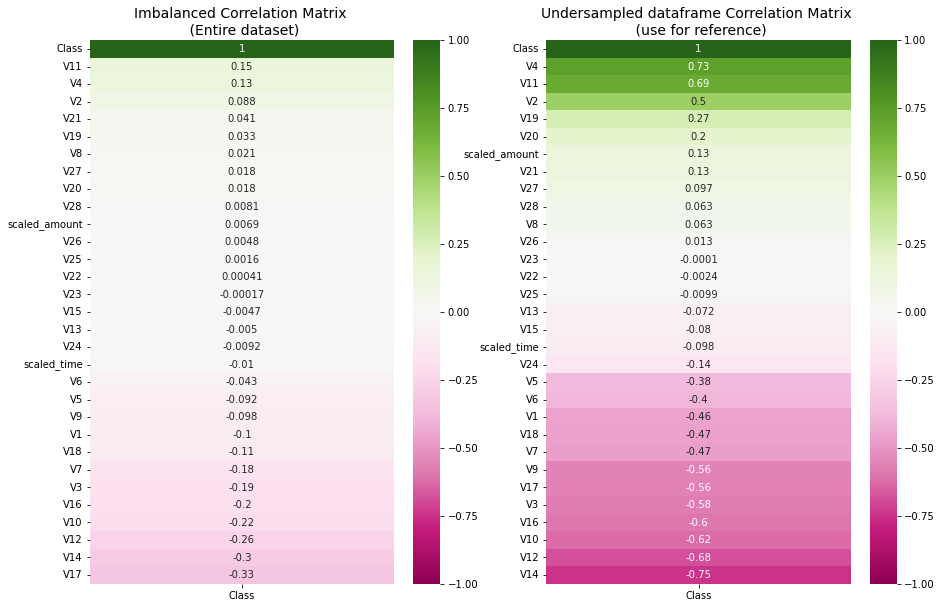

In [39]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sns.heatmap(corr[['Class']].sort_values(by=['Class'],ascending=False),
            annot_kws={"size": 10},vmin=-1,cmap='PiYG', annot=True,ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (Entire dataset)", fontsize=14)


sns.heatmap(sub_sample_corr[['Class']].sort_values(by=['Class'],ascending=False),
            annot_kws={"size": 10},vmin=-1,cmap='PiYG', annot=True,ax=ax2)
ax2.set_title("Undersampled dataframe Correlation Matrix \n (use for reference)", fontsize=14)

In [40]:
negative_corr=['V14','V12','V10','V16','V3','V17','V7','V18','V1','V6','V5','V9']

In [41]:
#f, axes = plt.subplots(nrows=3,ncols=4, figsize=(25,15))
#for i in range(3):
 #   for z in range(4):
   #     for feature in negative_corr:
       #     sns.boxplot(x="Class", y=feature, data=df, ax=axes[i,z])
            
            

In [42]:
#f, axes = plt.subplots(nrows=3,ncols=4, figsize=(25,15))
#for i in negative_corr:
  #  sns.boxplot(x="Class", y=i, data=df
  #  for j in range(3):
   #     for z in range(4):
      #      sns.boxplot(x="Class", y=i, data=df, ax=axes[j,z])

## Negative Correlations with our Class 
__The lower the feature value the more likely it will be a fraud transaction__

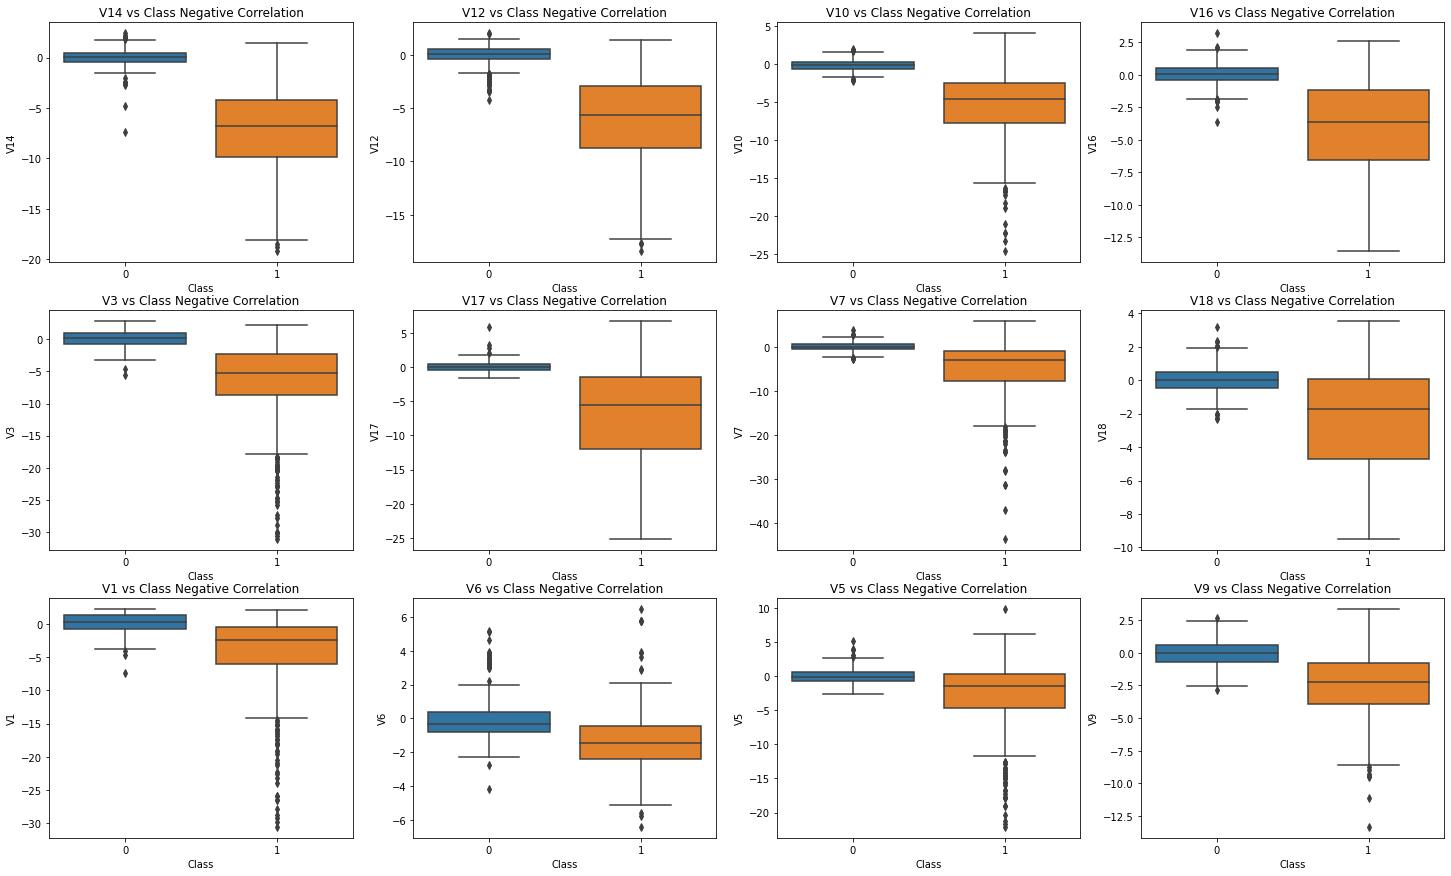

In [43]:
f, axes = plt.subplots(nrows=3,ncols=4, figsize=(25,15))

sns.boxplot(x="Class", y="V14", data=df, ax=axes[0,0])
axes[0,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=df,ax=axes[0,1])
axes[0,1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=df,ax=axes[0,2])
axes[0,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V16',data=df,ax=axes[0,3])
axes[0,3].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=df, ax=axes[1,0])
axes[1,0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V17',data=df,ax=axes[1,1])
axes[1,1].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V7',data=df,ax=axes[1,2])
axes[1,2].set_title('V7 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V18',data=df,ax=axes[1,3])
axes[1,3].set_title('V18 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V1", data=df, ax=axes[2,0])
axes[2,0].set_title('V1 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V6',data=df,ax=axes[2,1])
axes[2,1].set_title('V6 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V5',data=df,ax=axes[2,2])
axes[2,2].set_title('V5 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V9',data=df,ax=axes[2,3])
axes[2,3].set_title('V9 vs Class Negative Correlation');



## Positive correlations 
__The higher the feature value the higher probability that it will be a fraud transaction__

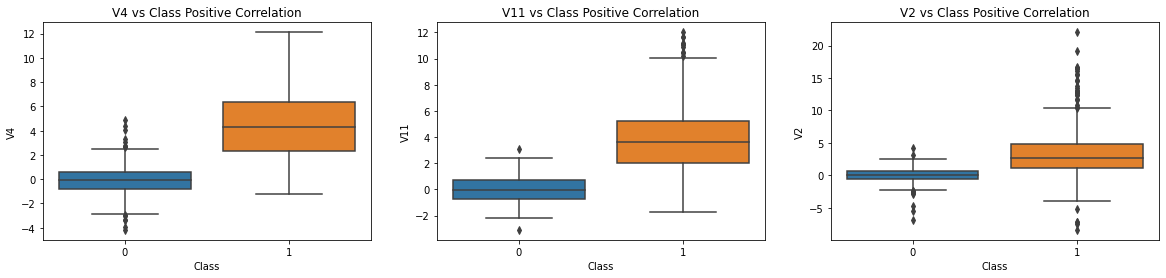

In [44]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
sns.boxplot(x="Class", y="V4", data=df, ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=df, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation');

## Anomaly Detection

We want to remove the `extreme outliers` from the the high correlation features with Class, That can improve the accuracy of our model. We will not remove all the outliers to avoid information loss, we will just remove the extreme ones.

__Steps:__

     - we will use the IQR which will be calculated by subtracting the Q3 from Q1.
     - We will set a threshould which will be beyound the Q3 and Q1 to only detect the extreme outliers and keeping the rest.
     - The threshold is determined by multiplying a number by the interquartile range. The higher this number is, the less
     outliers will be detected. The lower this threshold is, the more outliers it will detect.

#### Visulize the distribution of the highest correlated features

In [45]:
highly_corr_features=['V4','V11','V14','V12']

In [46]:
V4_fraud_dist = df['V4'].loc[df['Class'] == 1].values
V11_fraud_dist = df['V11'].loc[df['Class'] == 1].values
V14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
V12_fraud_dist = df['V12'].loc[df['Class'] == 1].values

Text(0.5, 1.0, 'V14 Distribution \n (Fraud Transactions)')

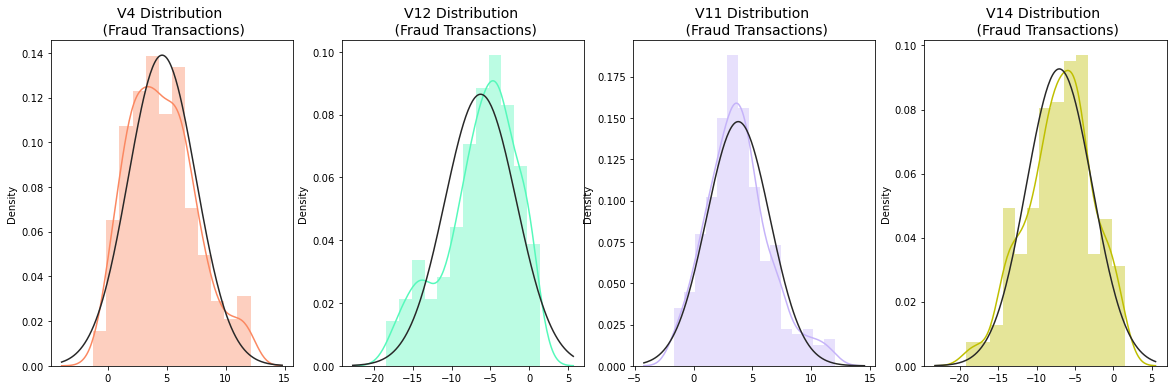

In [47]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

sns.distplot(V4_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(V12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(V11_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(V14_fraud_dist,ax=ax4, fit=norm, color='y')
ax4.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

## Removing Extreme outliers

In [48]:
# setting the thersold to 1.5

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [49]:
df_fraud=df.loc[df['Class'] == 1 ]

### Extreme outliers for V4

In [50]:
# Extreme outliers for V14

outliers(df_fraud,'V4')

(12.456628273371138, -3.750198471313106)

In [51]:
upper, lower=outliers(df_fraud,'V4')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  12.456628273371138
Lower Whisker:  -3.750198471313106


In [52]:
# checking the outliers 
outlier=[]
for i in df_fraud['V4']:
    if i < lower or i > upper:
        outlier.append(i)

In [53]:
print('Number of fraud extreme outliers for V4: ',len(outlier))
print('The fraud outliers values for V4 ',outlier)

Number of fraud extreme outliers for V4:  0
The fraud outliers values for V4  []


In [54]:
# removing the outliers from the dataframe

#new_df = df[(df['V4'] > lower) & (df['V4'] < upper)] # take all the values above lower and all the values below upper
#new_df2 = df.drop(df[(df['V14'] > upper) | (df['V14'] < lower)].index)

In [55]:
#new_df2 = df.drop(df[(df['V14'] > upper) | (df['V14'] < lower)].index)

In [56]:
df_fraud=df.loc[df['Class'] == 1 ]

In [57]:
len(df)

686

### Extreme outliers for V12

In [58]:
# Extreme outliers for V12

outliers(df_fraud,'V12')

(5.76275970406479, -17.46956256389873)

In [59]:
upper, lower=outliers(df_fraud,'V12')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  5.76275970406479
Lower Whisker:  -17.46956256389873


In [60]:
# checking the outliers 
outlier=[]
for i in df_fraud['V12']:
    if i < lower or i > upper:
        outlier.append(i)

In [61]:
print('Number of fraud extreme outliers for V12: ',len(outlier))
print('The fraud outliers values for V12 ',outlier)

Number of fraud extreme outliers for V12:  3
The fraud outliers values for V12  [-18.4311310279993, -17.631606313870698, -17.7691434633638]


In [62]:
# removing the outliers from the dataframe

new_df = df[(df['V12'] > lower) & (df['V12'] < upper)]

In [63]:
len(new_df) # 3 row removed

683

### Extreme outliers for V11

In [64]:
df_fraud=new_df.loc[new_df['Class'] == 1 ]

In [65]:
# Extreme outliers for V11

outliers(df_fraud,'V11')

(10.039028933656981, -2.8473352157192084)

In [66]:
upper, lower=outliers(df_fraud,'V11')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  10.039028933656981
Lower Whisker:  -2.8473352157192084


In [67]:
# checking the outliers 
outlier=[]
for i in df_fraud['V11']:
    if i < lower or i > upper:
        outlier.append(i)

In [68]:
print('Number of fraud extreme outliers for V11: ',len(outlier))
print('The fraud outliers values for V11 ',outlier)

Number of fraud extreme outliers for V11:  9
The fraud outliers values for V11  [10.8530116481991, 10.5452629545898, 10.1875873241664, 11.6692047358121, 10.446846814514, 11.0270590938161, 11.228470279576, 11.152490598583698, 10.0637897462894]


In [69]:
# removing the outliers from the dataframe

new_df = new_df[(new_df['V11'] > lower) & (new_df['V11'] < upper)]

In [70]:
len(new_df)

673

### Extreme outliers for V14

In [71]:
df_fraud=new_df.loc[new_df['Class'] == 1 ]

In [72]:
# Extreme outliers for V11

outliers(df_fraud,'V14')

(3.68785764968416, -16.967343833840133)

In [73]:
upper, lower=outliers(df_fraud,'V14')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  3.68785764968416
Lower Whisker:  -16.967343833840133


In [74]:
# checking the outliers 
outlier=[]
for i in df_fraud['V14']:
    if i < lower or i > upper:
        outlier.append(i)

In [75]:
print('Number of fraud extreme outliers for V14: ',len(outlier))
print('The fraud outliers values for V14 ',outlier)

Number of fraud extreme outliers for V14:  1
The fraud outliers values for V14  [-17.6206343516773]


In [76]:
# removing the outliers from the dataframe

new_df = new_df[(new_df['V14'] > lower) & (new_df['V14'] < upper)]

In [77]:
len(new_df)

672

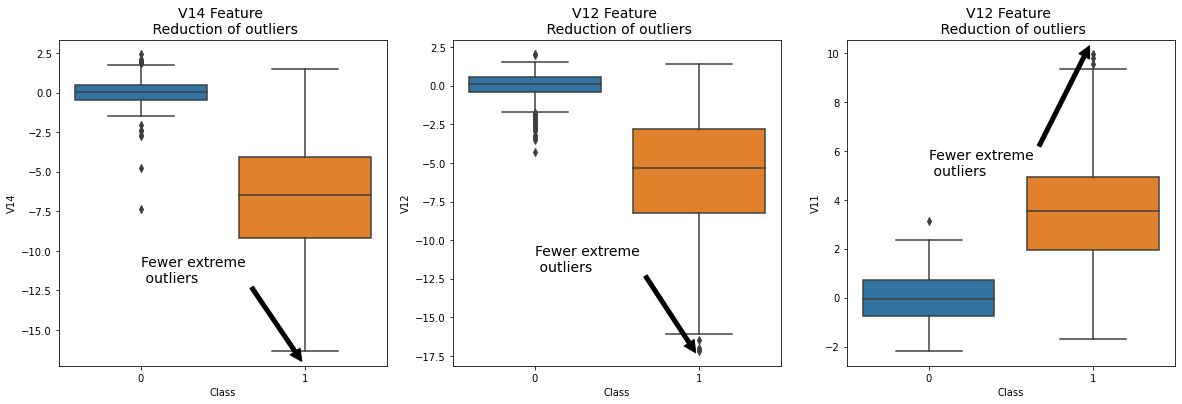

In [78]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17), xytext=(0, -12),
             arrowprops=dict(facecolor='black'),fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


# Feature 11
sns.boxplot(x="Class", y="V11", data=new_df, ax=ax3)
ax3.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, 10.3), xytext=(0, 5),
            arrowprops=dict(facecolor='black'),
            fontsize=14);

In [79]:
# checking the final df
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
47,-0.321084,0.836512,-0.742182,-0.701522,0.998196,-0.902667,0.639055,0.153341,-0.333154,-0.842458,...,1.278432,-0.090199,0.534110,-0.780533,-0.351613,0.146115,0.166626,0,-0.292983,0.525943
55,2.127554,-1.551985,-0.355897,-1.425165,-1.676873,-0.705231,-1.212498,-0.208941,-1.135844,1.449743,...,-0.607668,0.402901,-0.051864,-0.614145,-0.491166,0.035739,-0.021507,0,0.809715,0.593497
219,0.251492,0.939998,-0.623150,-0.362205,1.361844,-0.907140,1.143896,-0.444603,0.129260,-0.569688,...,0.962588,-0.321665,-0.825114,-0.243216,-0.119030,0.228596,-0.037284,0,-0.287678,0.587175
185323,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,-5.620232,-15.123752,...,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,1,0.327878,0.108615
76,1.375792,-0.414610,0.579765,-0.659644,-1.046697,-1.002681,-0.463264,-0.252209,-0.915278,0.569307,...,-0.324959,0.107835,0.394751,0.260781,-0.484899,0.014071,0.027633,0,0.042014,-0.491785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1.166075,-1.142217,0.916128,-0.673762,-1.366329,0.478491,-1.311252,0.348172,-0.205943,0.629487,...,1.020986,-0.174172,-0.277795,0.342094,-0.017592,0.043764,0.018148,0,0.753882,-0.290900
68784,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,...,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1,-0.042293,-0.590618
183,1.148796,-0.004964,0.827780,0.761462,-0.912108,-0.991064,-0.160838,-0.149432,0.279300,-0.081745,...,0.102467,0.007094,0.742650,0.279719,0.323144,-0.022172,0.029272,0,0.249991,-0.373317
85,2.013881,0.137353,-1.797628,0.557850,0.157857,-1.505522,0.292655,-0.383898,0.629665,-0.517121,...,0.679707,-0.047730,-0.103067,0.243447,-0.101260,-0.007545,-0.025836,0,0.079003,0.764407


# Modeling 

In [80]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import cross_val_score

In [90]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [91]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('the training accuracy for : ',classifier, 'is : ',round(training_score.mean(), 2) * 100,"%")

the training accuracy for :  LogisticRegression() is :  94.0 %
the training accuracy for :  KNeighborsClassifier() is :  94.0 %
the training accuracy for :  SVC() is :  94.0 %
the training accuracy for :  DecisionTreeClassifier() is :  92.0 %


In [92]:
from sklearn.model_selection import GridSearchCV

__1- Tuning logistic regression__

In [93]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [94]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)

In [95]:
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [96]:
# Best parameters
log_reg=grid_log_reg.best_estimator_

__2- Tune KNN__

In [97]:
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [98]:
grid_knears = GridSearchCV(KNeighborsClassifier(), knn_params)

In [99]:
grid_knears.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4]})

In [100]:
# Best parameters
KNN=grid_knears.best_estimator_

__3- Tune Support Vector Classifier__

In [101]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

In [102]:
grid_svc = GridSearchCV(SVC(), svc_params)

In [103]:
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 0.7, 0.9, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [104]:
# Best parameters
svc=grid_svc.best_estimator_

__4-Tune Desicion Tree__

In [105]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

In [106]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)

In [107]:
grid_tree.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]})

In [108]:
tree_clf = grid_tree.best_estimator_

__Evaluating the tuned models__

In [109]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.6%


In [110]:
knears_score = cross_val_score(KNN, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 93.66%


In [111]:
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 94.41%


In [112]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 93.66%


__AS we can see, logistic regression got the best accuracy__

## 2- Undersample using NearMiss Algorithm
Near-miss is an algorithm that can help in balancing an imbalanced dataset. It can be grouped under undersampling algorithms and is an efficient way to balance the data. The algorithm does this by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

In [145]:
# We will undersample during cross validating
undersample_X = train.drop('Class', axis=1)
undersample_y = train['Class']

__Implementing NearMiss Technique__

In [146]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [147]:
#Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)

X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)

In [148]:
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 343, 1: 343})


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_nearmiss, y_nearmiss, test_size=0.2)

In [150]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('the training accuracy for : ',classifier, 'is : ',round(training_score.mean(), 2) * 100,"%")

the training accuracy for :  LogisticRegression() is :  96.0 %
the training accuracy for :  KNeighborsClassifier() is :  94.0 %
the training accuracy for :  SVC() is :  93.0 %
the training accuracy for :  DecisionTreeClassifier() is :  93.0 %


In [151]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [152]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)

In [153]:
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [154]:
# Best parameters
log_reg=grid_log_reg.best_estimator_

In [155]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.62%


In [156]:
log_pred = log_reg.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,recall_score, precision_score, f1_score

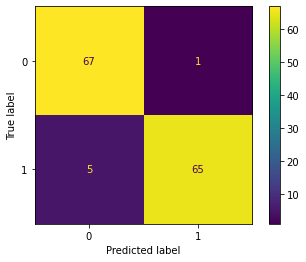

In [158]:
#confusion matrix
plot_confusion_matrix(log_reg,X_test,y_test)

In [159]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.98      0.93      0.96        70

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



## 3- SMOTE

In [169]:
# We will undersample during cross validating
oversample_X = train.drop('Class', axis=1)
oversample_y = train['Class']

In [170]:
from imblearn.over_sampling import SMOTE

In [171]:
X_SMOTE, y_SMOTE = SMOTE().fit_resample(oversample_X.values, oversample_y.values)

In [175]:
print('SMOTE Label Distribution: {}'.format(Counter(y_SMOTE)))

SMOTE Label Distribution: Counter({0: 199021, 1: 199021})


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2)

In [174]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('the training accuracy for : ',classifier, 'is : ',round(training_score.mean(), 2) * 100,"%")

the training accuracy for :  LogisticRegression() is :  95.0 %
the training accuracy for :  KNeighborsClassifier() is :  100.0 %
the training accuracy for :  SVC() is :  98.0 %
the training accuracy for :  DecisionTreeClassifier() is :  100.0 %


In [177]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [178]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)

In [179]:
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [180]:
# Best parameters
log_reg=grid_log_reg.best_estimator_

In [181]:
log_pred = log_reg.predict(X_test)

In [182]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.28%


In [183]:
print('Model accuracy after tuning:',log_reg.score(X_test,y_test)*100,'%')

Model accuracy after tuning: 95.38494391337663 %


In [184]:
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [185]:
grid_knears = GridSearchCV(KNeighborsClassifier(), knn_params)

In [186]:
grid_knears.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4]})

In [187]:
# Best parameters
KNN=grid_knears.best_estimator_

In [188]:
KNN_pred = KNN.predict(X_test)

In [189]:
knears_score = cross_val_score(KNN, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 99.96%


In [190]:
print('Model accuracy after tuning:',KNN.score(X_test,y_test)*100,'%')

Model accuracy after tuning: 99.95729126103832 %


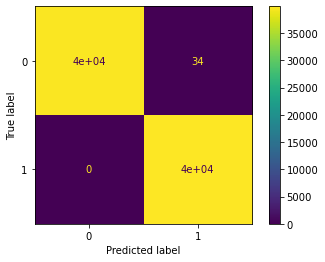

In [191]:
#confusion matrix
plot_confusion_matrix(KNN,X_test,y_test)

In [193]:
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39721
           1       1.00      1.00      1.00     39888

    accuracy                           1.00     79609
   macro avg       1.00      1.00      1.00     79609
weighted avg       1.00      1.00      1.00     79609

